In [0]:
#pip install tensorflow==2.0.0

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [0]:
data = pd.read_csv('musk_csv.csv')

In [152]:
data


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,-153,-20,-130,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,-153,-26,-127,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,-153,-27,-127,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,-153,-21,-130,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [158]:
#data.drop(columns=['molecule_name','ID','conformation_name'], inplace=True)
data.describe() #checking  the datafor any special pattern

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,-180.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.00000

In [174]:
data['class'].value_counts() # we have very in inbalance  data set  


0    5581
1    1017
Name: class, dtype: int64

In [0]:
y = data.iloc[:,-1]  #class data denotes this row is musk or not we place depandable variable in y
x = data.drop(columns='class') # we have features in x  


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x) #scalling the unbalance data 

from sklearn.model_selection import train_test_split
y = y.values 
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size =0.2, random_state =41) #splitting the data in to 80:20 ratio





In [0]:
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import  EarlyStopping # impporting all the layers and deep learning library 

In [0]:
model = Sequential() #creating a simple 2 hidden layer ANN  Classifier

model.add(Dense(x.shape[1], activation='relu', input_dim =x.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

monitor = EarlyStopping(monitor='val_accuracy',patience=10 , restore_best_weights=True)

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [146]:
r = model.fit(x_train,y_train, epochs=50,validation_data=(x_test, y_test),  callbacks=[monitor])

Train on 5278 samples, validate on 1320 samples
Epoch 1/50
5278/5278 [==============================] - 1s 190us/sample - loss: 0.2023 - accuracy: 0.9164 - val_loss: 0.1014 - val_accuracy: 0.9644
Epoch 2/50
5278/5278 [==============================] - 1s 97us/sample - loss: 0.0918 - accuracy: 0.9653 - val_loss: 0.0680 - val_accuracy: 0.9720
Epoch 3/50
5278/5278 [==============================] - 0s 94us/sample - loss: 0.0572 - accuracy: 0.9788 - val_loss: 0.0426 - val_accuracy: 0.9826
Epoch 4/50
5278/5278 [==============================] - 0s 94us/sample - loss: 0.0415 - accuracy: 0.9848 - val_loss: 0.0333 - val_accuracy: 0.9902
Epoch 5/50
5278/5278 [==============================] - 0s 92us/sample - loss: 0.0288 - accuracy: 0.9886 - val_loss: 0.0350 - val_accuracy: 0.9864
Epoch 6/50
5278/5278 [==============================] - 1s 100us/sample - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0215 - val_accuracy: 0.9917
Epoch 7/50
5278/5278 [==============================] - 0s 89us/samp

In [0]:
final_predicted = [] #if value is above 0.5 it will be 1 and and below it will be assign 0
predicted_y = model.predict(x_test)
for i in predicted_y:
    if i>0.5:
        final_predicted.append(1)
    else:
        final_predicted.append(0)

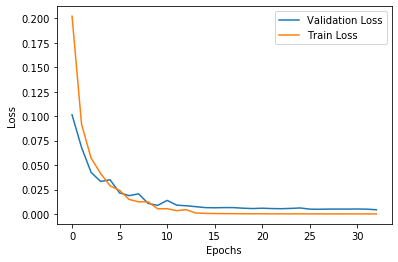

In [165]:
import matplotlib.pyplot as plt
plt.plot(r.history['val_loss'],label="Validation Loss")
plt.plot(r.history['loss'],label="Train Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


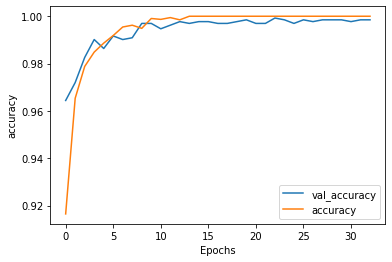

In [166]:
plt.plot(r.history['val_accuracy'],label="val_accuracy")
plt.plot(r.history['accuracy'],label="accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
cm = confusion_matrix(final_predicted,y_test)
#we have almost 100% accuracy 
cm # we can see there are only 1 wrong value prediicted 

array([[1119,    0],
       [   1,  200]])

In [169]:
cr = classification_report(y_test, final_predicted)
print(cr) #we have  here classification reoprt f1 and recall value

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [0]:
model.save('task.h5',)